 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [10]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns and Algorithmic Returns

Read the Whale Portfolio daily returns and clean the data

In [187]:
# Reading returns
whale_csv = Path('whale_returns.csv')
algo_csv = Path('algo_returns.csv')

whale_df = pd.read_csv(whale_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df = pd.read_csv(algo_csv, parse_dates=True, index_col="Date", infer_datetime_format=True )


In [188]:
# Count nulls
print(whale_df.isnull().sum())
print(algo_df.isnull().sum())
print(sp500_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
Algo 1    0
Algo 2    6
dtype: int64
Close    0
dtype: int64


In [189]:
# Drop nulls
whale_df = whale_df.dropna()

algo_df = algo_df.dropna()

sp500_df = sp500_df.dropna()


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [190]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_df = sp500_df.sort_values(by = "Date")

In [191]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [196]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace('$','').astype('float')

print(sp500_df)
sp500_df.dtypes

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


Close    float64
dtype: object

In [197]:
# Calculate Daily Returns
sp500_returns_df = sp500_df.pct_change()


In [198]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()

In [199]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={'Close': "S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [201]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([sp500_returns_df, whale_df,algo_df], axis = 'columns', join='inner')
combined_portfolio.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

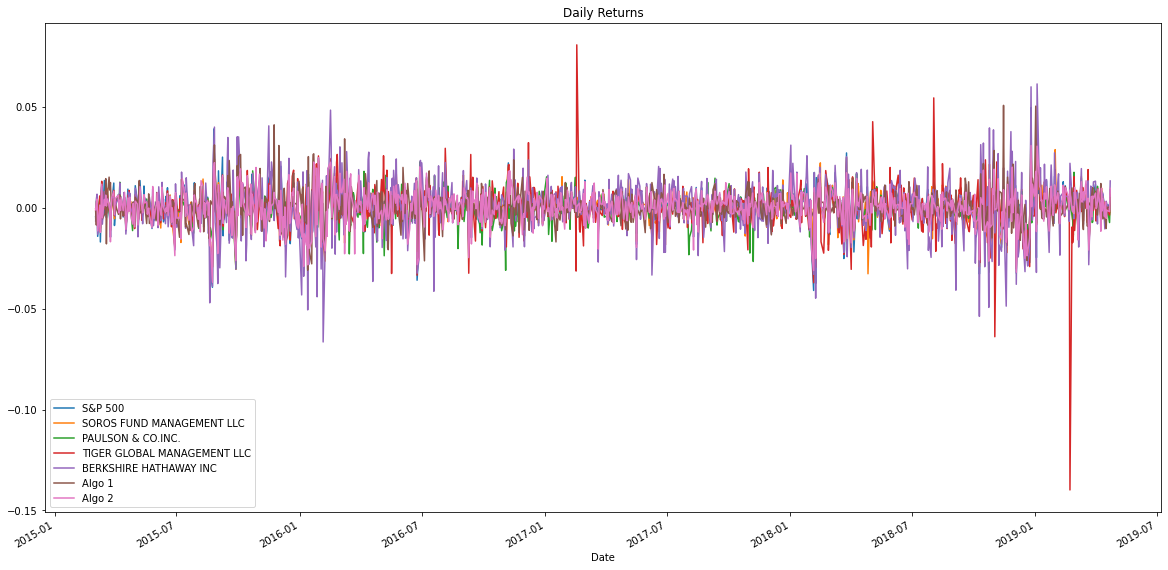

In [202]:
# Plot daily returns of all portfolios
combined_portfolio.plot(title = "Daily Returns", figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date'>

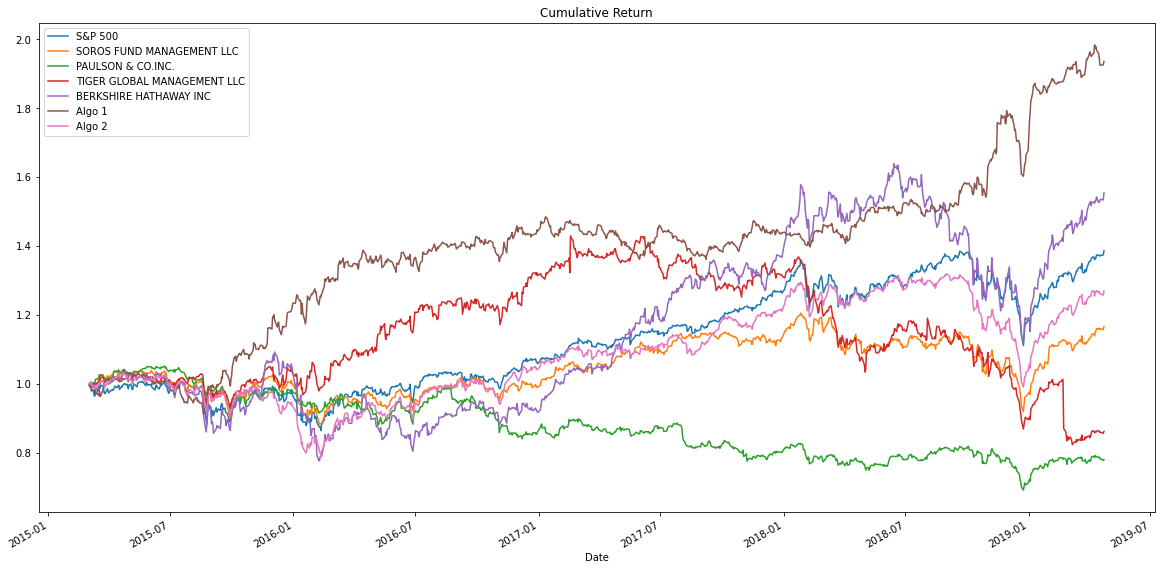

In [182]:
# Calculate cumulative returns of all portfolios
combined_portfolio_cumulative = (1 + combined_portfolio).cumprod()
# Plot cumulative returns
combined_portfolio_cumulative.plot(figsize=(20,10), title = "Cumulative Return")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plots'}>

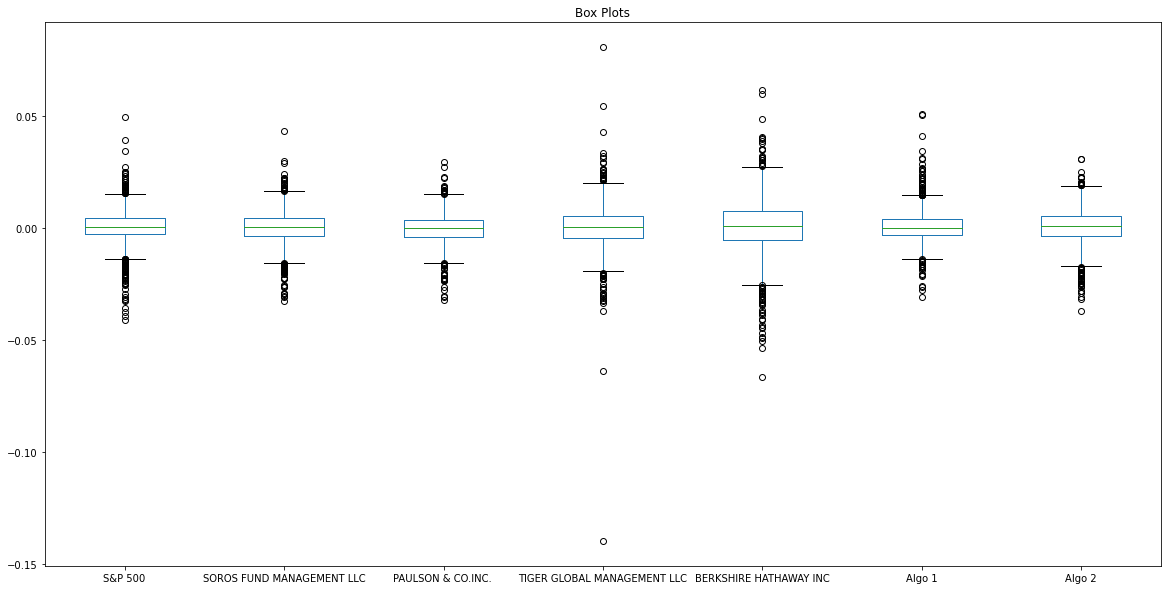

In [58]:
# Box plot to visually show risk
combined_portfolio.plot.box(title = 'Box Plots', figsize= (20,10))

### Calculate Standard Deviations

In [127]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = combined_portfolio.std().sort_values(ascending = True)
print(portfolio_std)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [131]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_portfolio['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
risky_or_not = portfolio_std > portfolio_std['S&P 500']
print(risky_or_not)
print('Tiger Global and Berkshire Hathaway are both riskier than the S&P 500')

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool
Tiger Global and Berkshire Hathaway are both riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std*np.sqrt(252)
print(annualized_std.sort_values(ascending = True))

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':' 21 Day Rolling STD'}, xlabel='Date'>

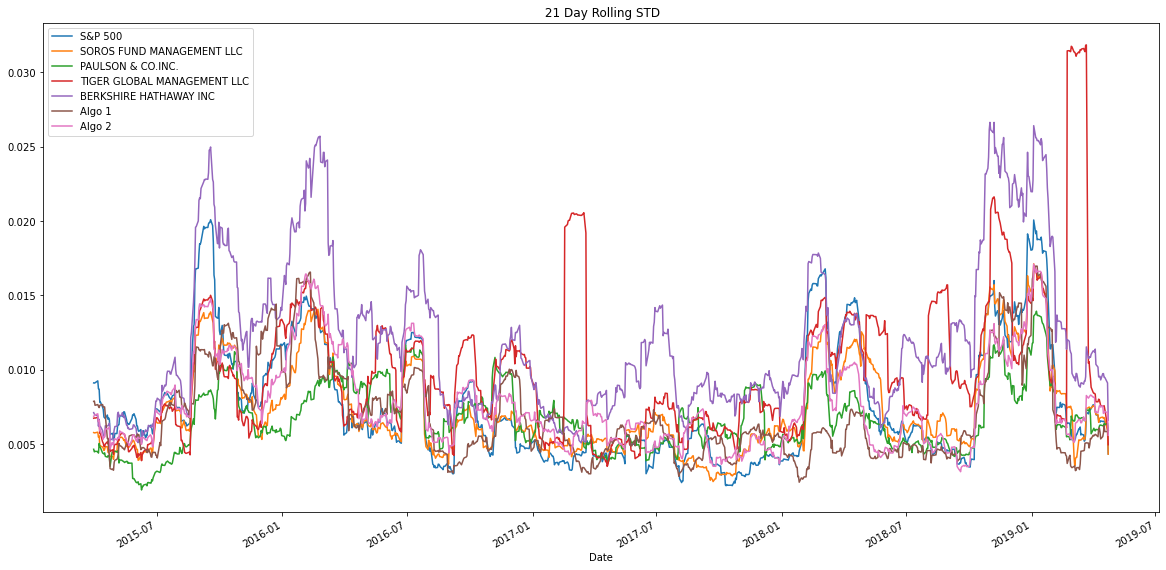

In [184]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolio_rolling_std = combined_portfolio.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_portfolio_rolling_std.plot(figsize = (20,10), title= ' 21 Day Rolling STD')

### Calculate and plot the correlation

<AxesSubplot:>

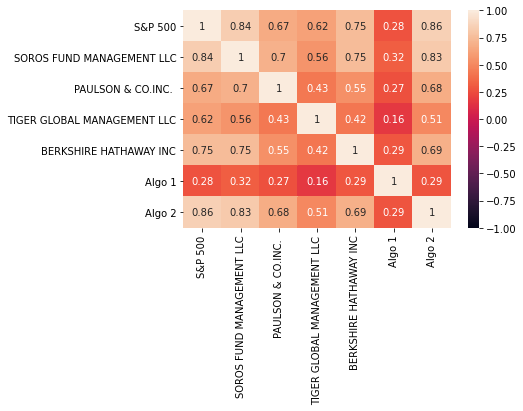

In [73]:
# Calculate the correlation
combined_portfolio_corr = combined_portfolio.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(combined_portfolio_corr, vmin = -1, vmax = 1, annot = True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

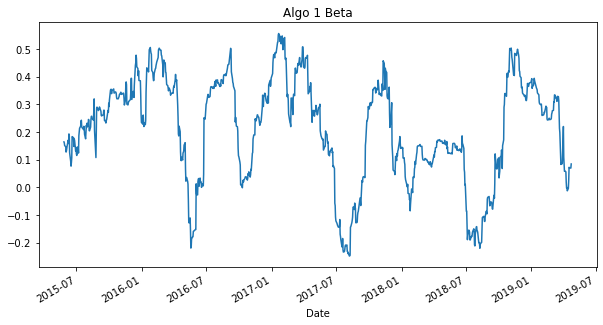

In [77]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_portfolio['Algo 1'].rolling(window = 60).cov(combined_portfolio['S&P 500'])

# Calculate variance of S&P 500
variance = combined_portfolio['S&P 500'].rolling(window = 60).var()

# Computing beta
algo_1_beta = algo_1_covariance / variance

# Plot beta trend
algo_1_beta_plot = algo_1_beta.plot(figsize = (10,5), title = 'Algo 1 Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

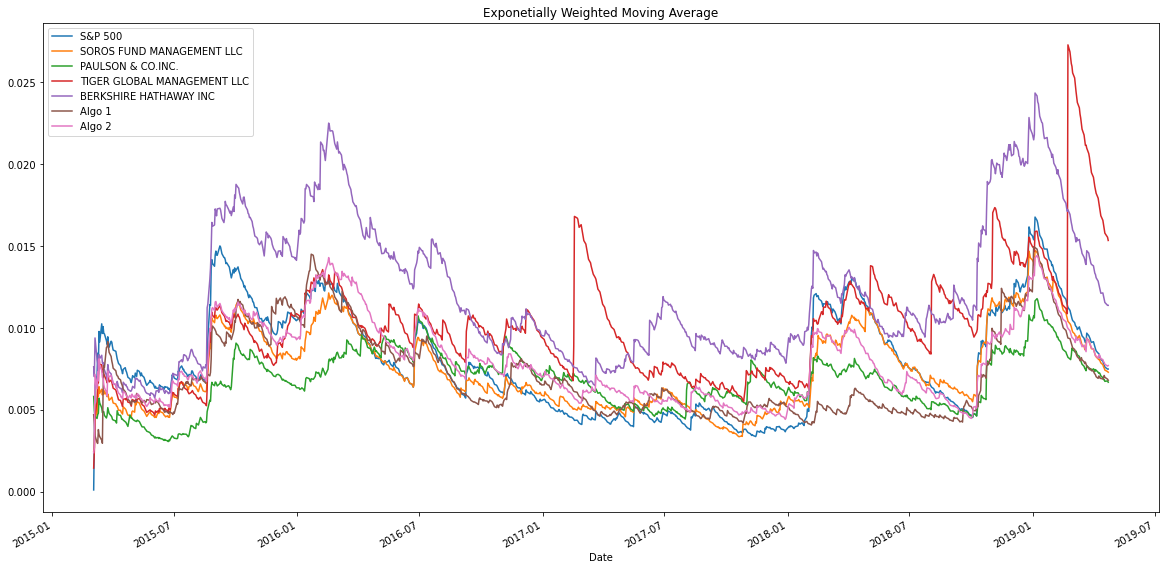

In [185]:
# Use `ewm` to calculate the rolling window
ewm = combined_portfolio.ewm(halflife = 21, adjust = True).std().plot(title = "Exponetially Weighted Moving Average", figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_portfolio.mean()*252)/ (combined_portfolio.std()* np.sqrt(252))
print(sharpe_ratio)

S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

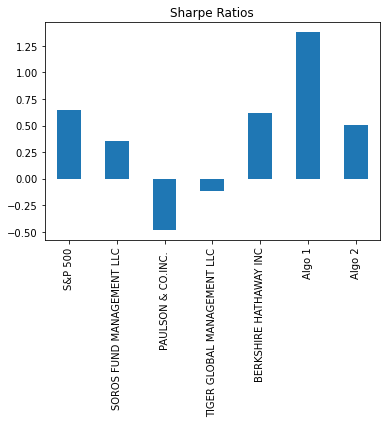

In [80]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind ='bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 easily outperforms the S&P 500 and Whale Portfolios. Algo 2 only outperforms 3 of the Whale Portfolios but fails to out perform the S&P 500.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [112]:
# Reading data from 1st stock
penn_csv = Path('PENN.csv')
penn_df = pd.read_csv(penn_csv,parse_dates=True, index_col="Date", infer_datetime_format=True)
penn_df = penn_df.rename(columns = {'Close' : 'Penn'})


In [113]:
# Reading data from 2nd stock
tsla_csv = Path('TSLA.csv')
tsla_df = pd.read_csv(tsla_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
tsla_df = tsla_df.rename(columns = {'Close' : 'TSLA'})


In [114]:
# Reading data from 3rd stock
gme_csv = Path('GME.csv')
gme_df = pd.read_csv(gme_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
gme_df = gme_df.rename(columns = {'Close' : 'GME'})

In [115]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([penn_df, tsla_df, gme_df], axis = 1, join = 'inner')
combined_stocks.sort_index(inplace = True)
combined_stocks.head()

,Penn,TSLA,GME
Date,,,
2014-01-02 16:00:00,14.16,30.02,49.65
2014-01-03 16:00:00,14.06,29.91,49.24
2014-01-06 16:00:00,13.84,29.40,48.17
2014-01-07 16:00:00,13.80,29.87,44.14
2014-01-08 16:00:00,13.42,30.26,45.35


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [133]:
# Calculate daily returns
combined_returns = combined_stocks.pct_change()
# Drop NAs
combined_returns = combined_returns.dropna()
combined_returns.index = combined_returns.index.date
# Display sample data
combined_returns.head()

,Penn,TSLA,GME
2014-01-03,-0.007062,-0.003664,-0.008258
2014-01-06,-0.015647,-0.017051,-0.021730
2014-01-07,-0.002890,0.015986,-0.083662
2014-01-08,-0.027536,0.013057,0.027413
2014-01-09,-0.027571,-0.024785,-0.008379


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [158]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = combined_returns.dot(weights)
# Display sample data
weighted_return.head()

2014-01-03   -0.006328
2014-01-06   -0.018143
2014-01-07   -0.023522
2014-01-08    0.004311
2014-01-09   -0.020245
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [165]:
# Join your returns DataFrame to the original returns DataFrame

combined_returns_total = pd.concat([combined_portfolio, combined_returns, weighted_return], axis= 'columns', join = 'inner')
combined_returns_total = combined_returns_total.rename(columns={0 :'Portfolio'})
combined_returns_total.head()



,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Penn,TSLA,GME,Portfolio
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.020190,0.011148,0.000259,-0.002928
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.022424,0.014533,0.034902,0.009003
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.009919,-0.008891,-0.000749,0.000093
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.022099,-0.033641,0.004000,-0.017247
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.018832,-0.015472,0.016683,0.006681


In [166]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_total = combined_returns_total.dropna()
combined_returns_total.isnull().sum()

S&P 500                        0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Penn                           0
TSLA                           0
GME                            0
Portfolio                      0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [167]:
# Calculate the annualized `std`
total_std = combined_returns_total.std()
total_annual_std = total_std * np.sqrt(252)
total_annual_std.sort_values(ascending = True)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Portfolio                      0.264369
Penn                           0.327886
GME                            0.414999
TSLA                           0.444024
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}>

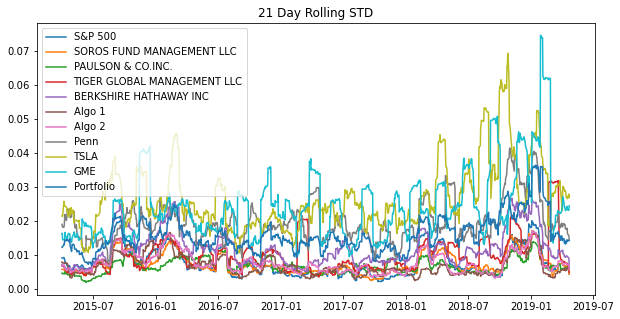

In [168]:
# Calculate rolling standard deviation
rolling_std_total = combined_returns_total.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_std_total.plot(title = "21 Day Rolling STD", figsize = (10,5))

### Calculate and plot the correlation

<AxesSubplot:>

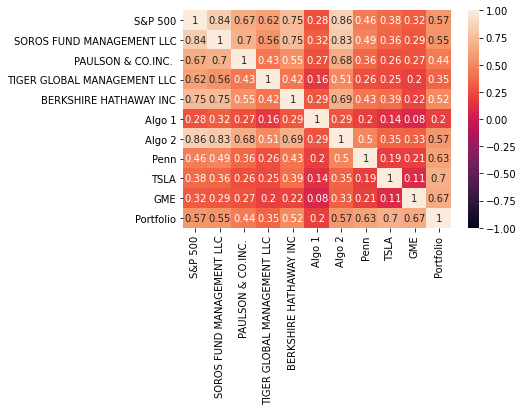

In [169]:
# Calculate and plot the correlation
total_correlation = combined_returns_total.corr()
sns.heatmap(total_correlation, vmin=-1, vmax= 1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Portfolio Beta'}>

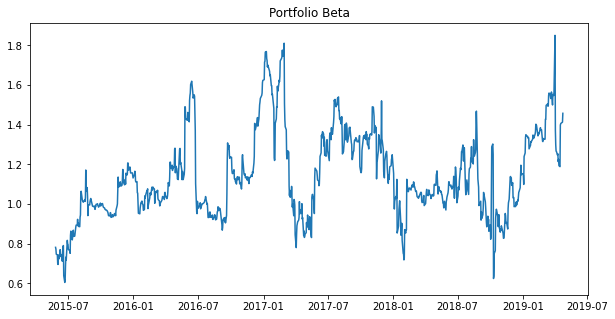

In [203]:
# Calculate and plot Beta
total_cov = combined_returns_total['Portfolio'].rolling(window = 60).cov(combined_returns_total['S&P 500'])
variance_2 = combined_returns_total['S&P 500'].rolling(window = 60).var()
portfolio_beta = total_cov / variance_2
portfolio_beta.plot(title = 'Portfolio Beta', figsize = (10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [178]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_2 = combined_returns_total.mean()*252 / (combined_returns_total.std() * np.sqrt(252))
sharpe_ratio_2.sort_values(ascending = True)

GME                           -0.641598
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
Portfolio                      0.026013
SOROS FUND MANAGEMENT LLC      0.356417
Penn                           0.361311
TSLA                           0.379314
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

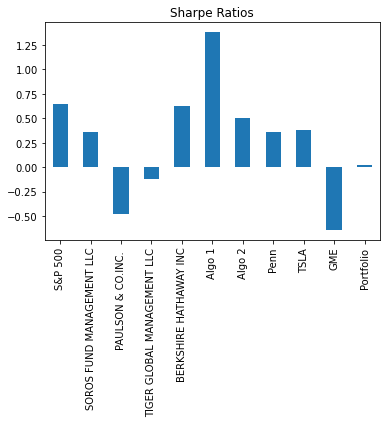

In [204]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot.bar(title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My new portfolio does not stack up well based on the sharp ratios. It has a sharpe ratio of close to 0 and is way below the S&P500 and a majority of the other assets. Based off of this Algo 1 is still the best choice to invest in.